In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load the dataset
with open('/content/Subtask_1_train.json') as f:
    data = json.load(f)

# Create a DataFrame
conversations = []
for conv in data:
    for utt in conv['conversation']:
        conversations.append({
            'conversation_ID': conv['conversation_ID'],
            'utterance_ID': utt['utterance_ID'],
            'text': utt['text'],
            'speaker': utt['speaker'],
            'emotion': utt['emotion']
        })
df = pd.DataFrame(conversations)

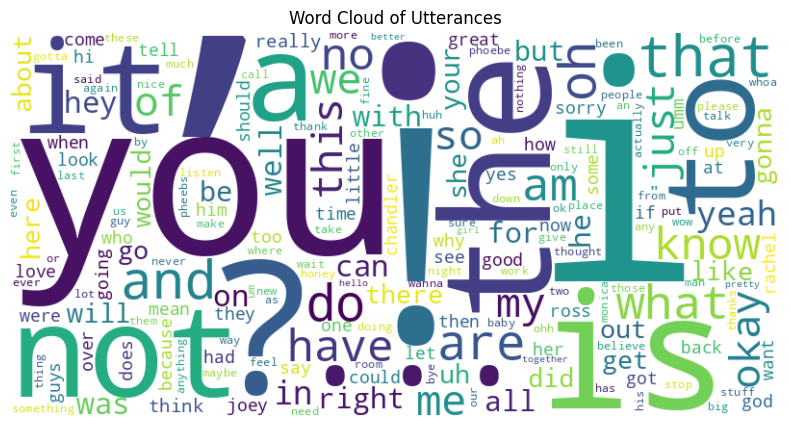

In [3]:
all_words = ' '.join(df['text']).lower().split()
word_freq = Counter(all_words)

# Data for word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Utterances')
plt.show()

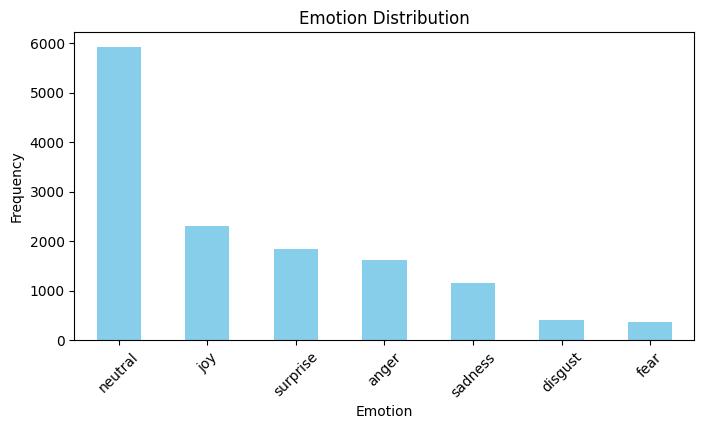

In [4]:
# Emotion distribution
emotion_counts = df['emotion'].value_counts()

# Plotting emotion distribution
plt.figure(figsize=(8, 4))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

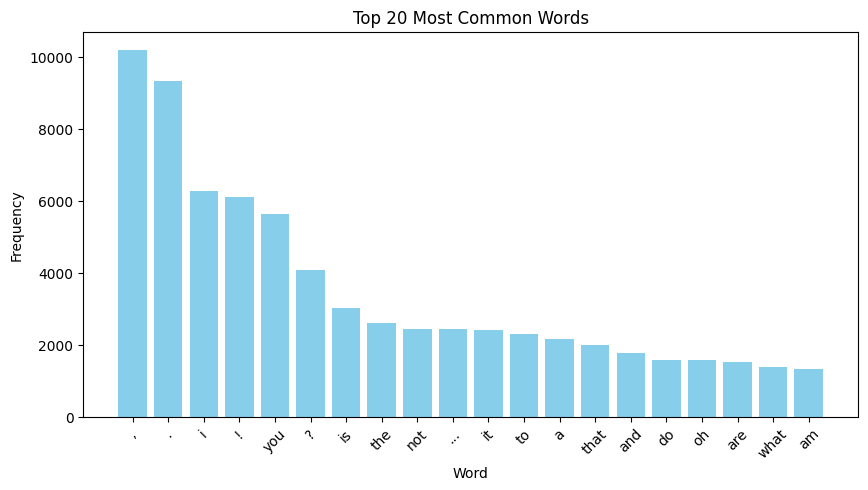

In [5]:
# Top 20 most common words
top_20_words = word_freq.most_common(20)
top_20_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])

# Plotting top 20 most common words
plt.figure(figsize=(10, 5))
plt.bar(top_20_df['Word'], top_20_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Displaying word frequencies and emotion distribution
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(word_freq_df.head(10))  # Display top 10 most frequent words
print(emotion_counts)

   Word  Frequency
1     ,      10194
18    .       9317
3     i       6268
52    !       6094
88  you       5632
33    ?       4076
28   is       3012
10  the       2615
43  not       2439
31  ...       2423
emotion
neutral     5929
joy         2301
surprise    1840
anger       1615
sadness     1147
disgust      414
fear         373
Name: count, dtype: int64


In [7]:
#!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load the dataset
with open('/content/Subtask_1_train.json') as f:
    data = json.load(f)

# Create a DataFrame
conversations = []
for conv in data:
    for utt in conv['conversation']:
        conversations.append({
            'conversation_ID': conv['conversation_ID'],
            'utterance_ID': utt['utterance_ID'],
            'text': utt['text'],
            'speaker': utt['speaker'],
            'emotion': utt['emotion']
        })
df = pd.DataFrame(conversations)


In [9]:
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and (not token.is_punct or token.text in ['!', '?', '...'])]
    return ' '.join(tokens)

# Apply preprocessing to all text
df['cleaned_text'] = df['text'].apply(preprocess_text)

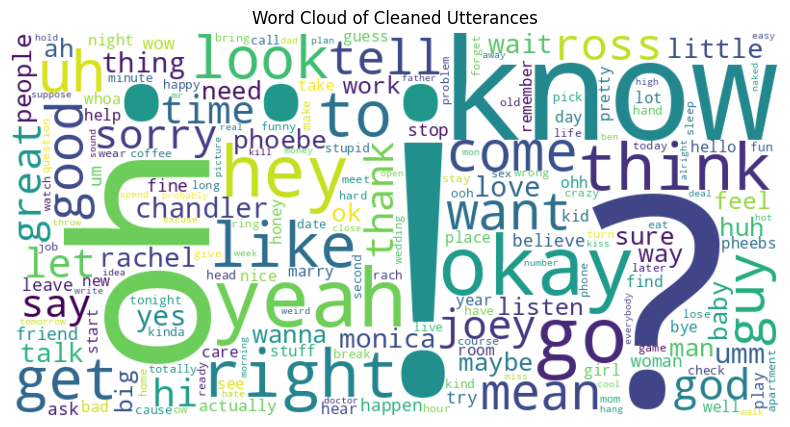

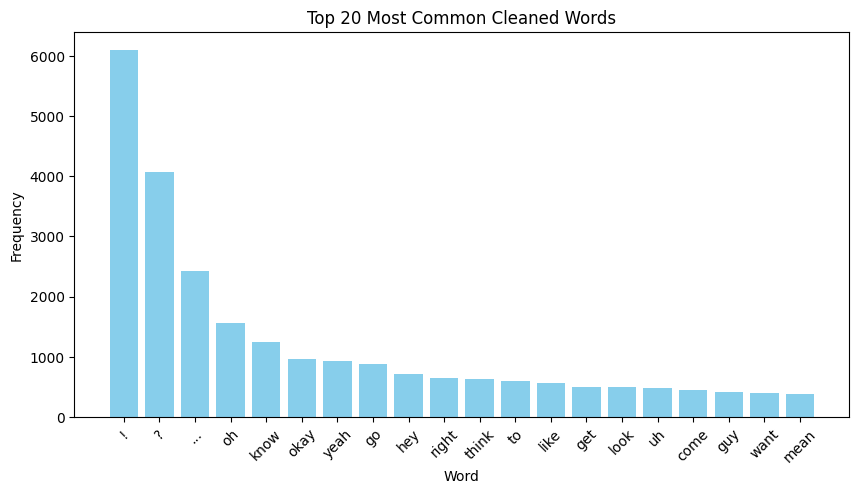

In [10]:
# Word frequency analysis on cleaned text
all_cleaned_words = ' '.join(df['cleaned_text']).split()
cleaned_word_freq = Counter(all_cleaned_words)

# Data for word cloud
cleaned_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cleaned_word_freq)

# Plotting cleaned word cloud
plt.figure(figsize=(10, 5))
plt.imshow(cleaned_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Utterances')
plt.show()

# Top 20 most common cleaned words
top_20_cleaned_words = cleaned_word_freq.most_common(20)
top_20_cleaned_df = pd.DataFrame(top_20_cleaned_words, columns=['Word', 'Frequency'])

# Plotting top 20 most common cleaned words
plt.figure(figsize=(10, 5))
plt.bar(top_20_cleaned_df['Word'], top_20_cleaned_df['Frequency'], color='skyblue')
plt.title('Top 20 Most Common Cleaned Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [11]:
from collections import defaultdict

def get_top_ngrams(text, n=2, top_k=20):
    doc = nlp(text)
    n_grams_freq = defaultdict(int)
    for token in doc:
        if token.is_stop or (token.is_punct and token.text not in ['!', '?', '...']):
            continue
        n_grams = doc[token.i:token.i+n]
        if len(n_grams) == n:
            n_grams_freq[str(n_grams)] += 1
    sorted_n_grams = sorted(n_grams_freq.items(), key=lambda item: item[1], reverse=True)[:top_k]
    return sorted_n_grams

# Get top bigrams
top_bigrams = get_top_ngrams(' '.join(df['cleaned_text']), n=2, top_k=20)
print("Top 20 Bigrams:", top_bigrams)

# Get top trigrams
top_trigrams = get_top_ngrams(' '.join(df['cleaned_text']), n=3, top_k=20)
print("Top 20 Trigrams:", top_trigrams)

Top 20 Bigrams: [('! !', 679), ('? !', 506), ('! oh', 353), ('? oh', 288), ('... ...', 271), ('! ?', 256), ('? yeah', 249), ('! hey', 242), ('oh god', 223), ('hey !', 223), ('! know', 208), ('! okay', 204), ('! ...', 156), ('oh !', 154), ('! yeah', 152), ('know ?', 151), ('? ?', 149), ('yeah !', 143), ('okay ?', 129), ('god !', 129)]
Top 20 Trigrams: [('! ! !', 192), ('oh god !', 105), ('! hey !', 98), ('! ? !', 82), ('... ... ...', 72), ('! oh god', 66), ('! go to', 57), ('? yeah !', 51), ('hey ! hey', 50), ('! oh !', 48), ('? ! !', 43), ('! hi !', 42), ('? go to', 41), ('! know !', 39), ('! yeah !', 39), ('? oh yeah', 36), ('! ! oh', 35), ('! come !', 33), ('uh ... huh', 32), ('? ! ?', 32)]


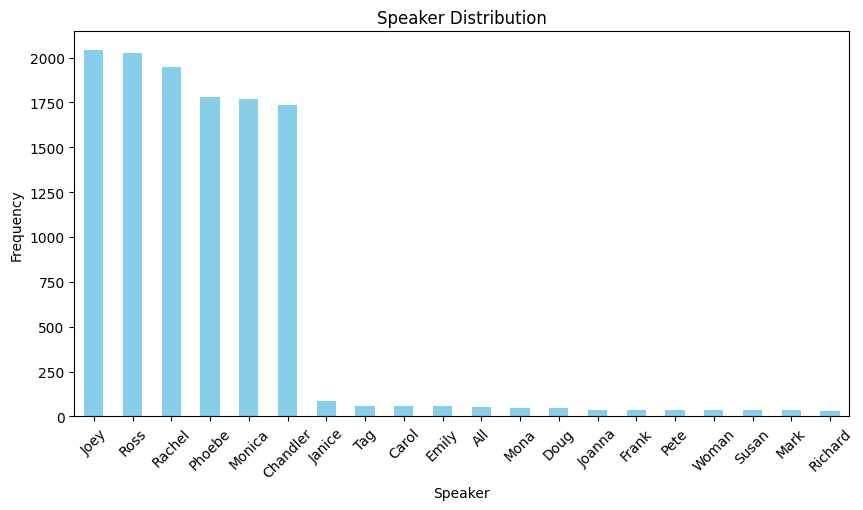

[('!', 2), ('say', 1), ('discover', 1), ('card', 1), ('hey', 1), ('proud', 1), ('sauce', 1), ('delicious', 1), ('lebanon', 1), ('long', 1)]


In [12]:
# Speaker frequency analysis
speaker_counts = df['speaker'].value_counts()

# Plotting speaker distribution
plt.figure(figsize=(10, 5))
speaker_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Speaker Distribution')
plt.xlabel('Speaker')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Top words by speaker
top_words_by_speaker = df.groupby('speaker')['cleaned_text'].apply(lambda x: ' '.join(x)).apply(lambda x: Counter(x.split()).most_common(10))
print(top_words_by_speaker[10])

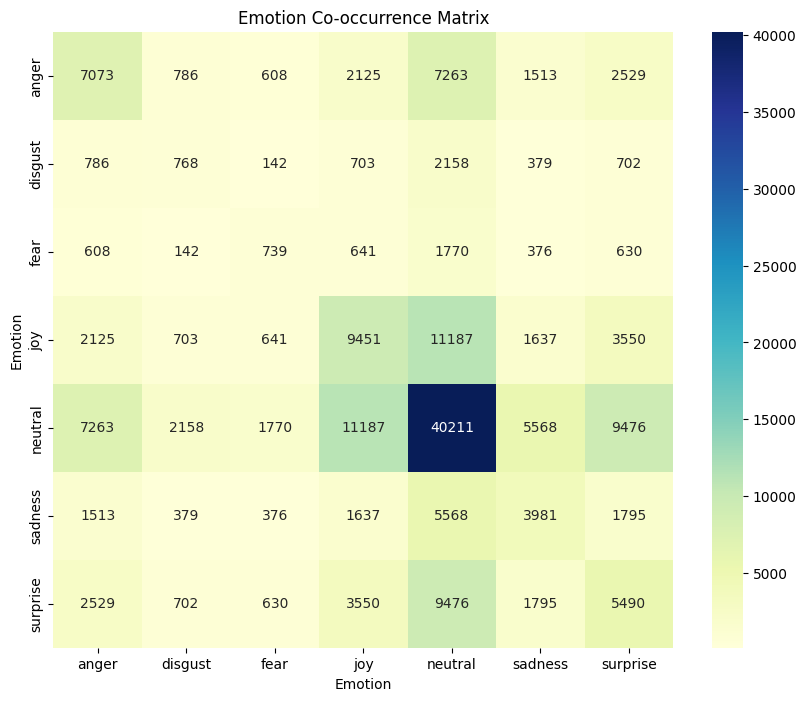

In [13]:
import seaborn as sns

# Create a matrix for emotion co-occurrence
emotion_matrix = pd.crosstab(df['emotion'], df['conversation_ID'])
co_occurrence_matrix = emotion_matrix.dot(emotion_matrix.T)

# Plotting the co-occurrence matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Emotion Co-occurrence Matrix')
plt.xlabel('Emotion')
plt.ylabel('Emotion')
plt.show()

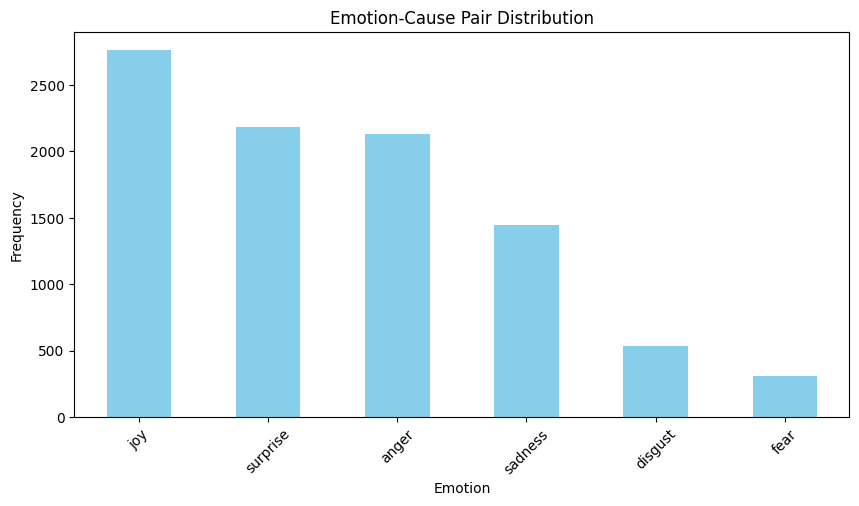

In [14]:
# Extract emotion-cause pairs from the dataset
emotion_cause_pairs = []
for conv in data:
    pairs = conv.get('emotion-cause_pairs', [])
    for pair in pairs:
        emotion_cause_pairs.append(pair)

# Create a DataFrame for emotion-cause pairs
pairs_df = pd.DataFrame(emotion_cause_pairs, columns=['emotion_cause', 'cause'])
pairs_df['emotion'] = pairs_df['emotion_cause'].apply(lambda x: x.split('_')[1])

# Plotting emotion-cause pair distribution
plt.figure(figsize=(10, 5))
pairs_df['emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion-Cause Pair Distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


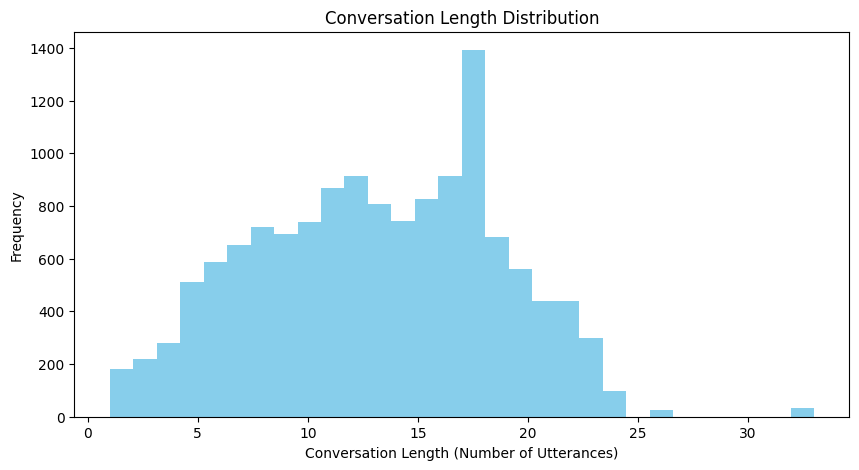

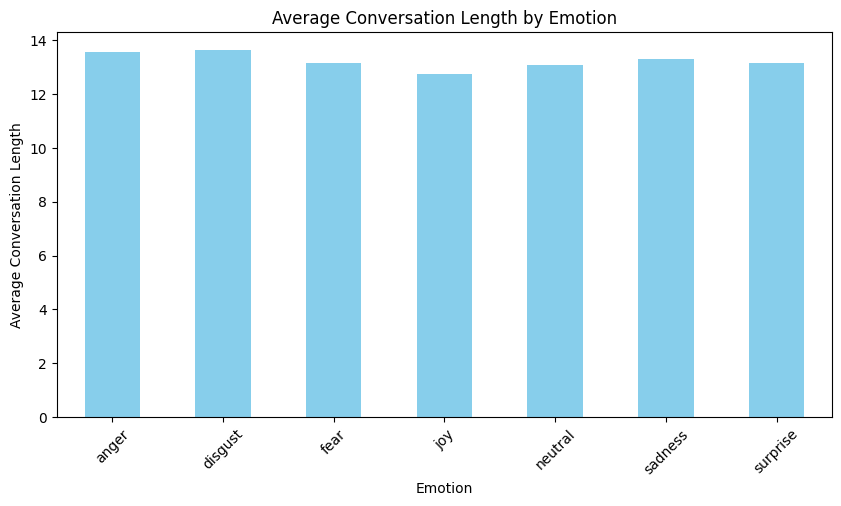

In [15]:
# Calculate conversation length
df['conversation_length'] = df.groupby('conversation_ID')['utterance_ID'].transform('max')

# Plotting conversation length distribution
plt.figure(figsize=(10, 5))
df['conversation_length'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Conversation Length Distribution')
plt.xlabel('Conversation Length (Number of Utterances)')
plt.ylabel('Frequency')
plt.show()

# Relationship between conversation length and emotions
avg_length_by_emotion = df.groupby('emotion')['conversation_length'].mean()

# Plotting average conversation length by emotion
plt.figure(figsize=(10, 5))
avg_length_by_emotion.plot(kind='bar', color='skyblue')
plt.title('Average Conversation Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Conversation Length')
plt.xticks(rotation=45)
plt.show()


In [16]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


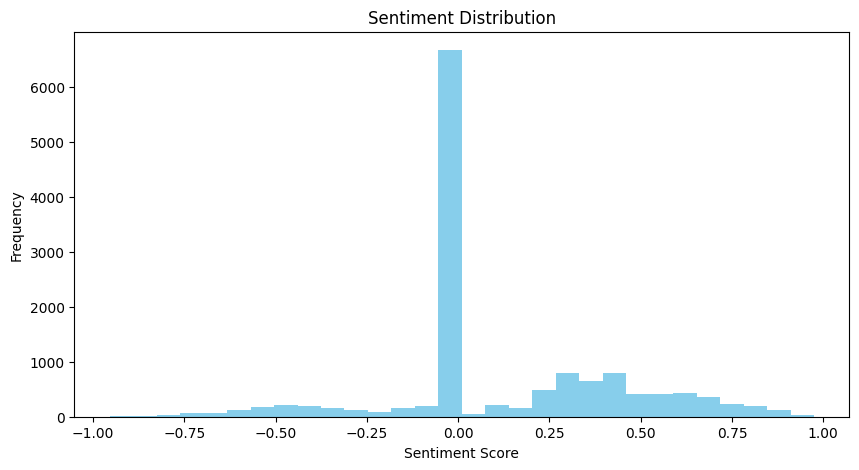

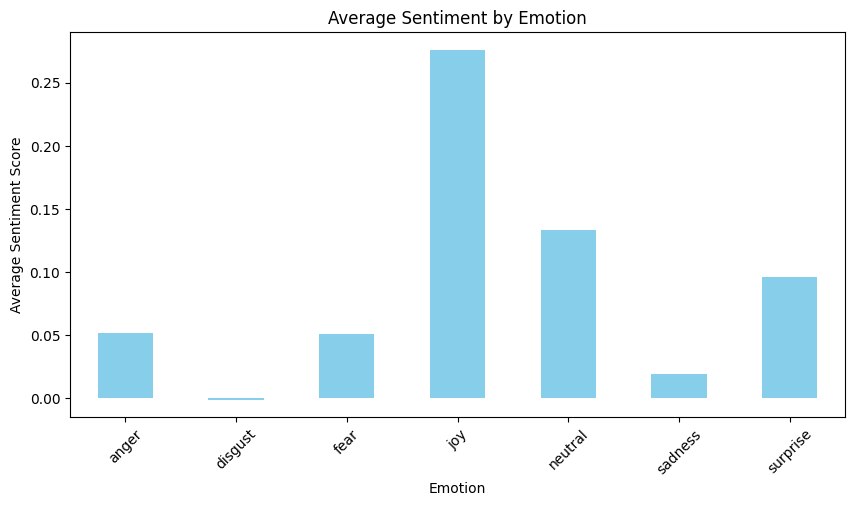

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plotting sentiment distribution
plt.figure(figsize=(10, 5))
df['sentiment'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Relationship between sentiment and emotions
avg_sentiment_by_emotion = df.groupby('emotion')['sentiment'].mean()

# Plotting average sentiment by emotion
plt.figure(figsize=(10, 5))
avg_sentiment_by_emotion.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Top words by speaker
top_words_by_speaker = df.groupby('speaker')['cleaned_text'].apply(lambda x: ' '.join(x)).apply(lambda x: Counter(x.split()).most_common(10))
print("Top 10 words by each speaker:")
print(top_words_by_speaker)

Top 10 words by each speaker:
speaker
1st Customer                                 [(delicious, 1), (!, 1)]
2nd Customer                [(duck, 1), (particular, 1), (superb, 1)]
3rd Customer        [(..., 2), (actually, 1), (small, 1), (complai...
A Female Student          [(yeah, 1), (girl, 1), (monica, 1), (?, 1)]
A Student                          [(happen, 1), (accent, 1), (?, 1)]
                                          ...                        
Whitney             [(go, 2), (kyle, 1), (night, 1), (pick, 1), (t...
Woman               [(!, 9), (?, 8), (..., 5), (think, 4), (hey, 3...
Woman On Train      [(coffee, 2), (?, 2), (bet, 1), (beautiful, 1)...
Young Ethan         [(..., 2), (sex, 1), (tell, 1), (old, 1), (thi...
an                        [(congratulation, 2), (!, 1), (wedding, 1)]
Name: cleaned_text, Length: 312, dtype: object


In [19]:
# Find the top 20 speakers by frequency
top_20_speakers = df['speaker'].value_counts().head(20).index

# Filter dataframe for only the top 20 speakers
top_speakers_df = df[df['speaker'].isin(top_20_speakers)]

# Get the top words by each of the top 20 speakers
top_words_by_speaker = top_speakers_df.groupby('speaker')['cleaned_text'].apply(lambda x: ' '.join(x)).apply(lambda x: Counter(x.split()).most_common(10))

top_words_by_speaker

speaker
All         [(!, 55), (hey, 13), (yeah, 11), (oh, 6), (hi,...
Carol       [(!, 15), (?, 10), (ross, 7), (susan, 7), (oh,...
Chandler    [(!, 700), (?, 533), (..., 360), (oh, 171), (k...
Doug        [(!, 20), (?, 12), (bing, 9), (good, 5), (...,...
Emily       [(?, 16), (!, 11), (go, 5), (right, 5), (say, ...
Frank       [(!, 32), (ow, 10), (..., 8), (?, 7), (yeah, 6...
Janice      [(!, 36), (?, 35), (..., 31), (oh, 29), (chand...
Joanna      [(!, 19), (?, 17), (..., 17), (oh, 8), (wait, ...
Joey        [(!, 1059), (?, 653), (..., 403), (hey, 199), ...
Mark        [(?, 9), (okay, 6), (hi, 5), (..., 5), (know, ...
Mona        [(!, 19), (?, 14), (oh, 8), (..., 8), (okay, 7...
Monica      [(!, 882), (?, 634), (..., 198), (oh, 173), (k...
Pete        [(?, 8), (!, 7), (..., 5), (ah, 5), (want, 5),...
Phoebe      [(!, 955), (?, 462), (oh, 296), (..., 242), (k...
Rachel      [(!, 977), (?, 573), (oh, 357), (..., 337), (k...
Richard     [(!, 9), (?, 8), (oh, 5), (tell, 3), (picture,...


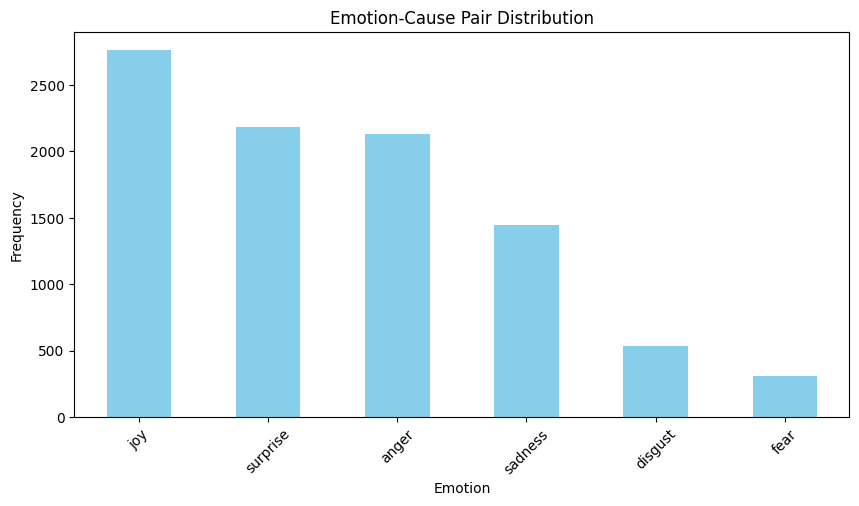

In [20]:
# Extract emotion-cause pairs from the dataset
emotion_cause_pairs = []
for conv in data:
    pairs = conv.get('emotion-cause_pairs', [])
    for pair in pairs:
        emotion_cause_pairs.append(pair)

# Create a DataFrame for emotion-cause pairs
pairs_df = pd.DataFrame(emotion_cause_pairs, columns=['emotion_cause', 'cause'])
pairs_df['emotion'] = pairs_df['emotion_cause'].apply(lambda x: x.split('_')[1])

# Plotting emotion-cause pair distribution
plt.figure(figsize=(10, 5))
pairs_df['emotion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion-Cause Pair Distribution')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

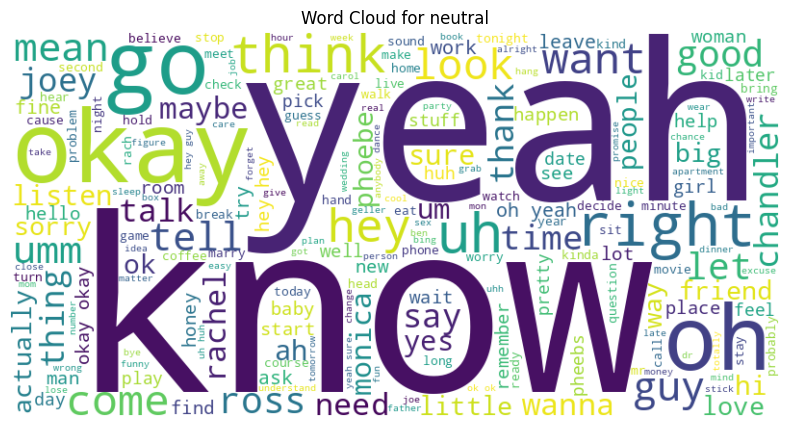

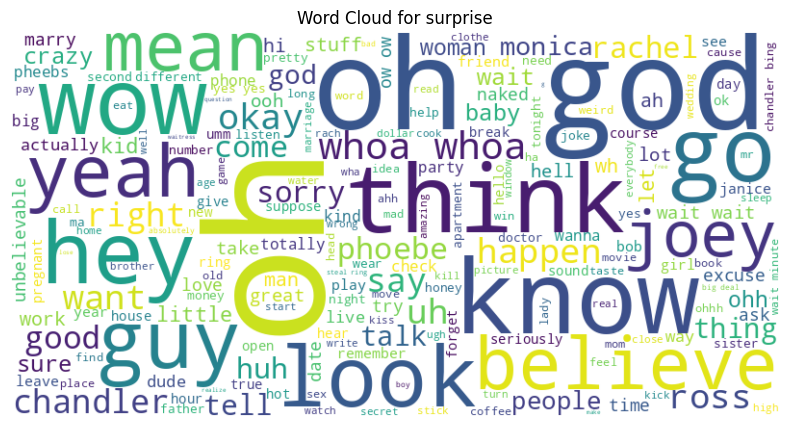

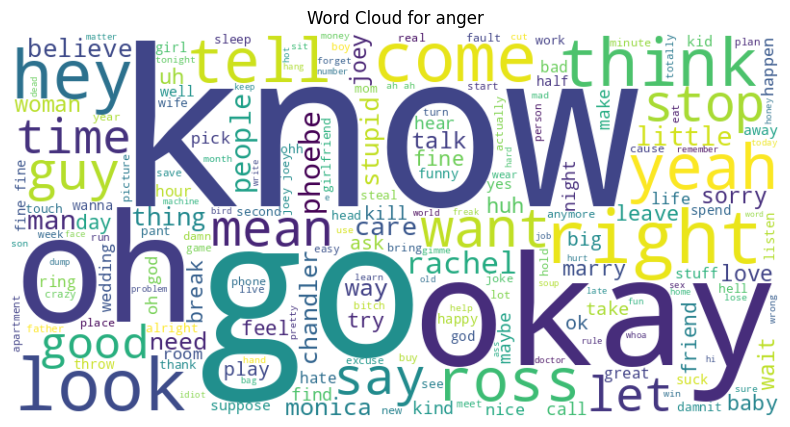

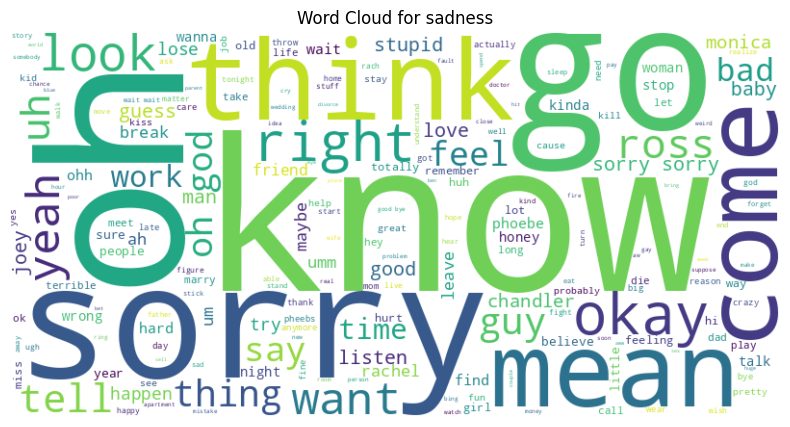

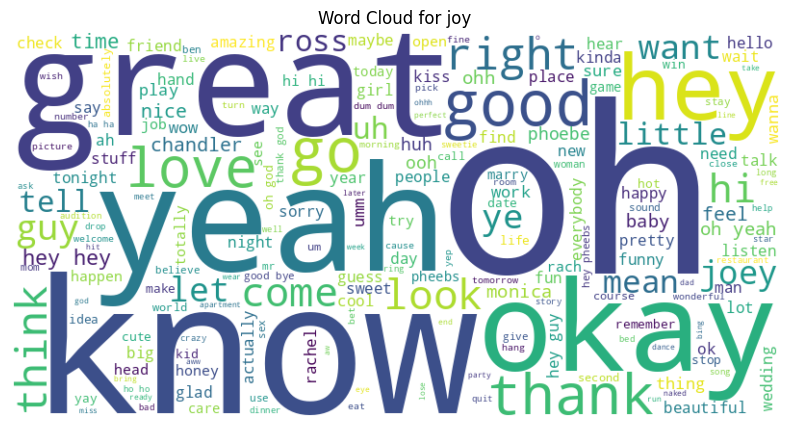

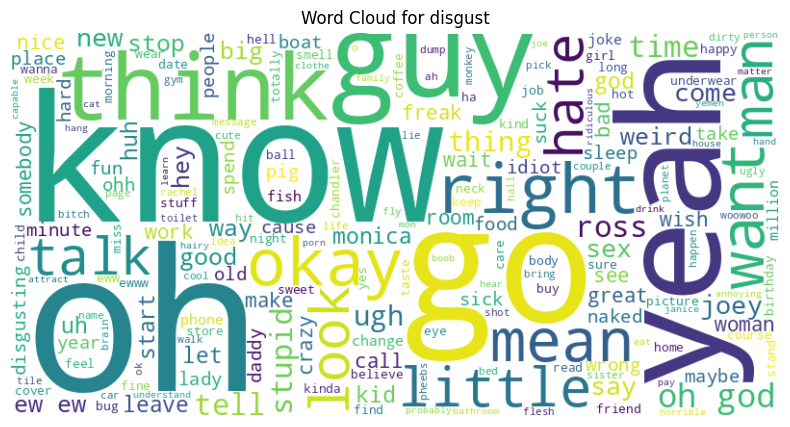

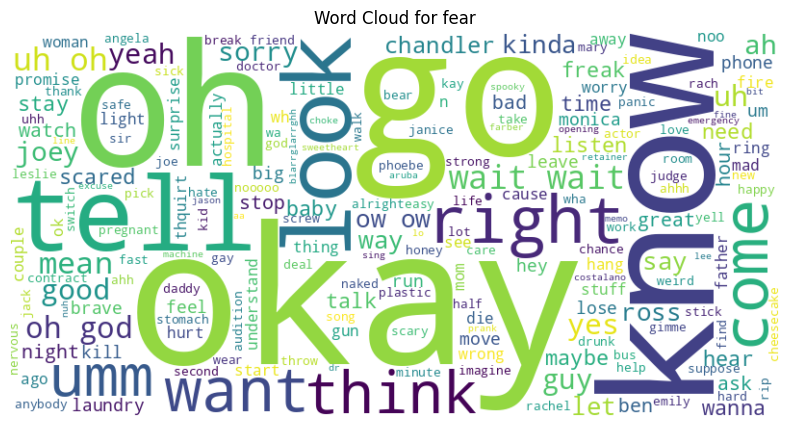

In [21]:
# Word clouds for each emotion
emotions = df['emotion'].unique()

for emotion in emotions:
    text = ' '.join(df[df['emotion'] == emotion]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion}')
    plt.show()

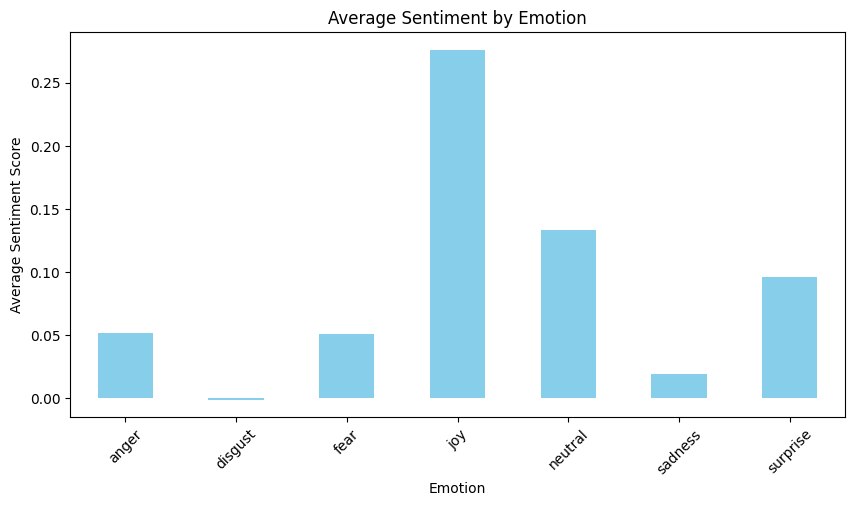

In [22]:
# Relationship between sentiment and emotions
avg_sentiment_by_emotion = df.groupby('emotion')['sentiment'].mean()

# Plotting average sentiment by emotion
plt.figure(figsize=(10, 5))
avg_sentiment_by_emotion.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Group by emotion and count the causes
top_causes_by_emotion = pairs_df.groupby('emotion')['cause'].apply(lambda x: Counter(x).most_common(10))

# Display the top causes for each emotion
for emotion, causes in top_causes_by_emotion.items():
    print(f"Top causes for {emotion}:")
    for cause, count in causes:
        print(f"  {cause}: {count}")


Top causes for anger:
  4_do not do that ! Cut it out !: 7
  5_It is worse than the thumb !: 7
  6_this is so unfair !: 7
  14_... I accept all those flaws , why can not you accept me for this ?: 7
  4_I sure as hell can not figure it out !: 7
  10_And now Pheebs , you are doing the same thing !: 7
  7_you put that on my alumni page !: 7
  6_I have been waiting four women , that is four , one higher than the number of centimeters that I am dilated , have come and gone with their babies !: 7
  8_you are whippin so slow ! Can not you do it any faster ?: 6
  10_There is not gonna be a wedding . Ross and I are not getting married .: 6
Top causes for disgust:
  15_he is the pig !: 4
  16_Such a pig !: 4
  13_You are disgusting !: 4
  17_he is such a pig: 3
  4_I know food and that was not it .: 3
  5_You are marinara sauce tasted like tomato juice !: 3
  8_we thought we would all go to a picnic , in Central Park !: 3
  10_That sucks !: 3
  7_I ... I ... I have not spoken to him in like ten 

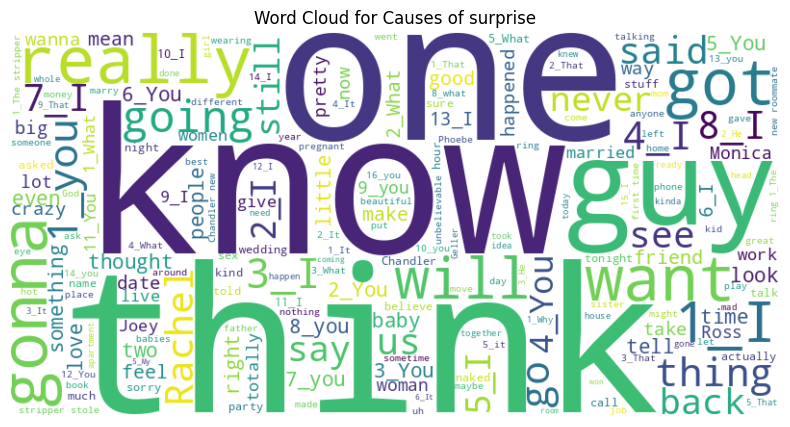

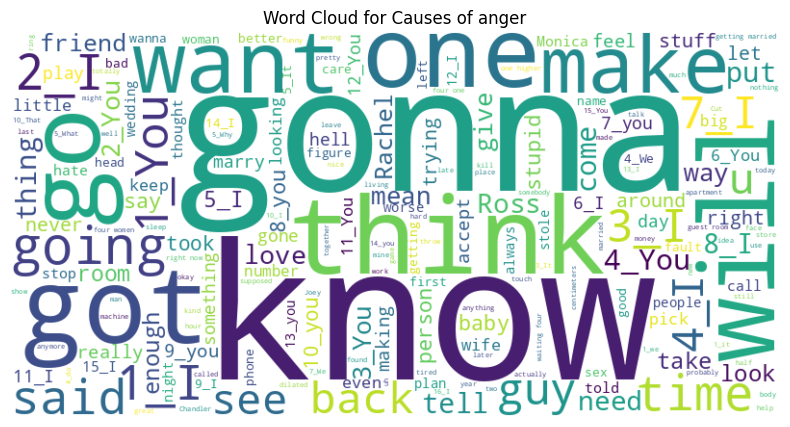

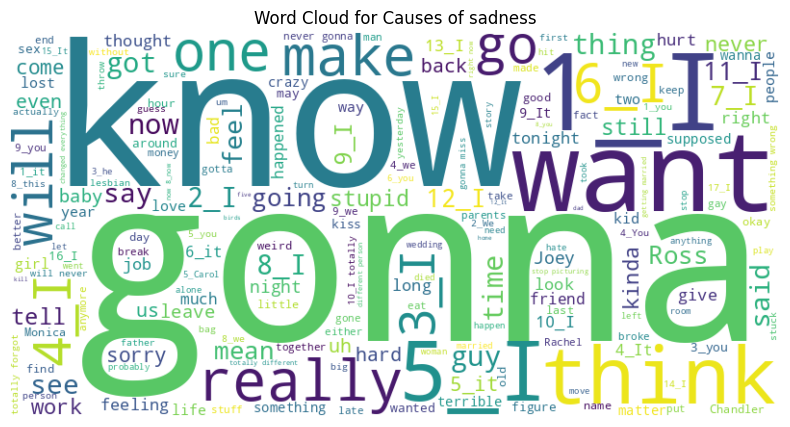

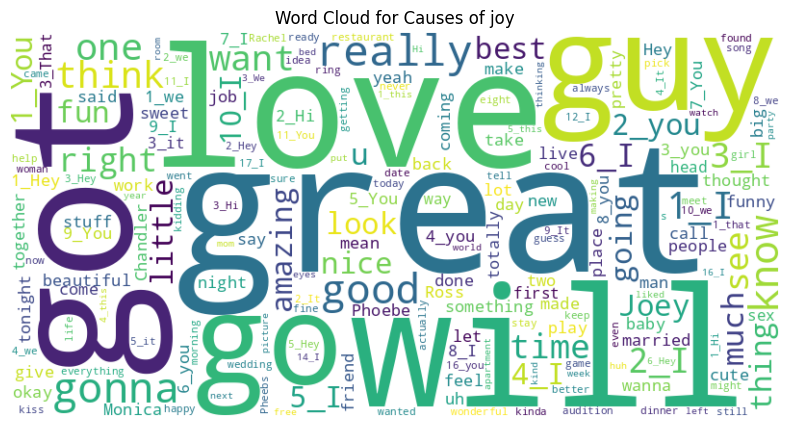

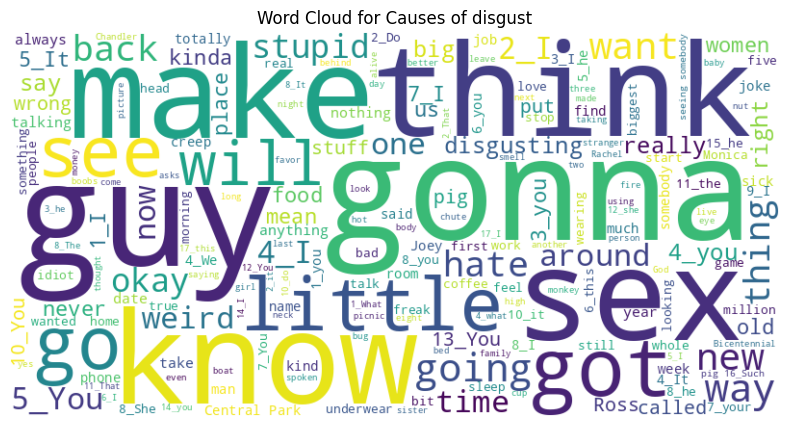

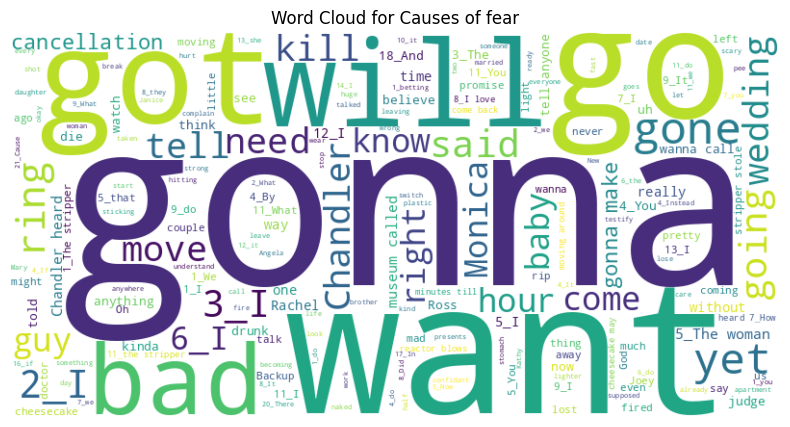

In [24]:
from wordcloud import WordCloud

# Generate word clouds for causes of each emotion
emotions = pairs_df['emotion'].unique()

for emotion in emotions:
    causes_text = ' '.join(pairs_df[pairs_df['emotion'] == emotion]['cause'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(causes_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Causes of {emotion}')
    plt.show()

#BaseLine Modelling

## Rule Based Baseline

In [25]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [26]:
train_df.columns

Index(['conversation_ID', 'utterance_ID', 'text', 'speaker', 'emotion',
       'cleaned_text', 'conversation_length', 'sentiment'],
      dtype='object')

In [27]:
def classify_emotion(text):
    joy_keywords = ["happy", "joy", "glad"]
    anger_keywords = ["angry", "mad", "furious"]
    sadness_keywords = ["sad", "unhappy", "down"]
    surprise_keywords = ["surprised", "shocked", "amazed"]

    text = text.lower()

    if any(word in text for word in joy_keywords):
        return "joy"
    elif any(word in text for word in anger_keywords):
        return "anger"
    elif any(word in text for word in sadness_keywords):
        return "sadness"
    elif any(word in text for word in surprise_keywords):
        return "surprise"
    else:
        return "neutral"

# Apply the rule-based emotion classifier
train_df['predicted_emotion'] = train_df['text'].apply(classify_emotion)
val_df['predicted_emotion'] = val_df['text'].apply(classify_emotion)

In [28]:
def classify_cause(text):
    cause_keywords = ["because", "due to", "as a result of"]
    text = text.lower()

    if any(phrase in text for phrase in cause_keywords):
        return True
    else:
        return False

# Apply the rule-based cause classifier
train_df['is_cause'] = train_df['text'].apply(classify_cause)
val_df['is_cause'] = val_df['text'].apply(classify_cause)

In [29]:
def extract_emotion_cause_pairs(conversation):
    pairs = []
    for i, utterance in enumerate(conversation):
        if utterance['emotion'] != 'neutral':
            # Rule: Look for causes in the current and previous utterance
            if i > 0 and conversation[i-1]['is_cause']:
                cause = conversation[i-1]['text']
                pairs.append((utterance['text'], cause))
            pairs.append((utterance['text'], utterance['text']))
    return pairs

# Apply the rule-based pair extraction
train_pairs = []
val_pairs = []

for conv_id in train_df['conversation_ID'].unique():
    conversation = train_df[train_df['conversation_ID'] == conv_id].to_dict('records')
    train_pairs.extend(extract_emotion_cause_pairs(conversation))

for conv_id in val_df['conversation_ID'].unique():
    conversation = val_df[val_df['conversation_ID'] == conv_id].to_dict('records')
    val_pairs.extend(extract_emotion_cause_pairs(conversation))

print(f"Train Emotion-Cause Pairs: {len(train_pairs)}")
print(f"Validation Emotion-Cause Pairs: {len(val_pairs)}")


Train Emotion-Cause Pairs: 6265
Validation Emotion-Cause Pairs: 1527


Accuracy: 0.4446
Precision: 0.3262
Recall: 0.4446
F1-Score: 0.2885

Classification Report:

              precision    recall  f1-score   support

       anger       0.14      0.01      0.02       294
     disgust       0.00      0.00      0.00        82
        fear       0.00      0.00      0.00        89
         joy       0.52      0.02      0.04       480
     neutral       0.45      0.98      0.62      1211
     sadness       0.23      0.03      0.05       226
    surprise       0.00      0.00      0.00       342

    accuracy                           0.44      2724
   macro avg       0.19      0.15      0.10      2724
weighted avg       0.33      0.44      0.29      2724



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

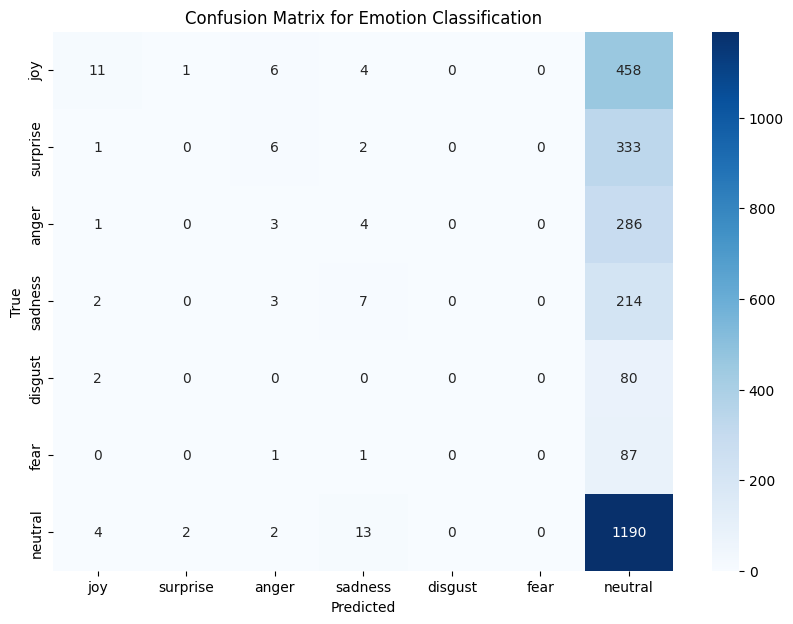

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate emotion classification
def evaluate_emotion_classification(true_emotions, predicted_emotions):
    accuracy = accuracy_score(true_emotions, predicted_emotions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_emotions, predicted_emotions, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n")
    print(classification_report(true_emotions, predicted_emotions))

    # Confusion Matrix
    cm = confusion_matrix(true_emotions, predicted_emotions, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'])
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], yticklabels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for Emotion Classification')
    plt.show()

# Evaluate on validation set
evaluate_emotion_classification(val_df['emotion'], val_df['predicted_emotion'])

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


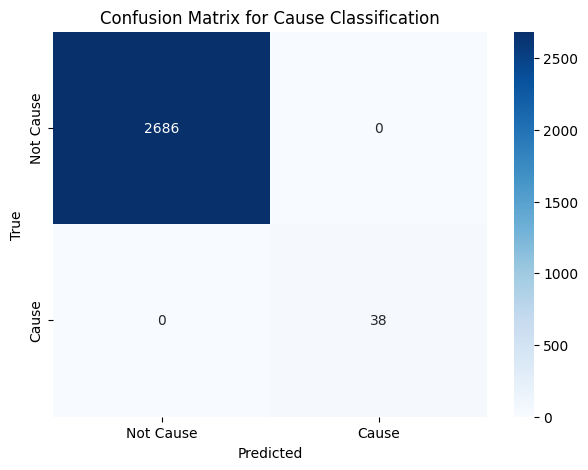

In [31]:
# Function to evaluate cause classification
def evaluate_cause_classification(true_causes, predicted_causes):
    accuracy = accuracy_score(true_causes, predicted_causes)
    precision, recall, f1, _ = precision_recall_fscore_support(true_causes, predicted_causes, average='binary')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(true_causes, predicted_causes)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Cause', 'Cause'], yticklabels=['Not Cause', 'Cause'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix for Cause Classification')
    plt.show()

# Evaluate on validation set
evaluate_cause_classification(val_df['is_cause'], val_df['is_cause'])

In [32]:
# Function to evaluate emotion-cause pair extraction
def evaluate_pair_extraction(true_pairs, predicted_pairs):
    true_set = set(true_pairs)
    predicted_set = set(predicted_pairs)

    true_positive = len(true_set & predicted_set)
    false_positive = len(predicted_set - true_set)
    false_negative = len(true_set - predicted_set)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Create true pairs for validation set
true_val_pairs = []
for conv_id in val_df['conversation_ID'].unique():
    conversation = val_df[val_df['conversation_ID'] == conv_id].to_dict('records')
    for utt in conversation:
        if utt['emotion'] != 'neutral' and utt['is_cause']:
            true_val_pairs.append((utt['text'], utt['text']))

# Evaluate emotion-cause pair extraction
evaluate_pair_extraction(true_val_pairs, val_pairs)


Precision: 0.0184
Recall: 1.0000
F1-Score: 0.0361


Logistic Regression - Emotion Classification:
Training Accuracy: 0.5885
Validation Accuracy: 0.5363
Precision: 0.4870
Recall: 0.5363
F1-Score: 0.4782

Logistic Regression - Cause Classification:
Training Accuracy: 0.9926
Validation Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1-Score: 0.9892
Error Analysis Report

Emotion Classification Errors:
Emotion Classification Report:

              precision    recall  f1-score   support

         joy       0.56      0.31      0.40       480
    surprise       0.61      0.46      0.53       342
       anger       0.37      0.19      0.25       294
     sadness       0.36      0.12      0.18       226
     disgust       0.00      0.00      0.00        82
        fear       0.00      0.00      0.00        89
     neutral       0.54      0.88      0.67      1211

    accuracy                           0.54      2724
   macro avg       0.35      0.28      0.29      2724
weighted avg       0.49      0.54      0.48      2724



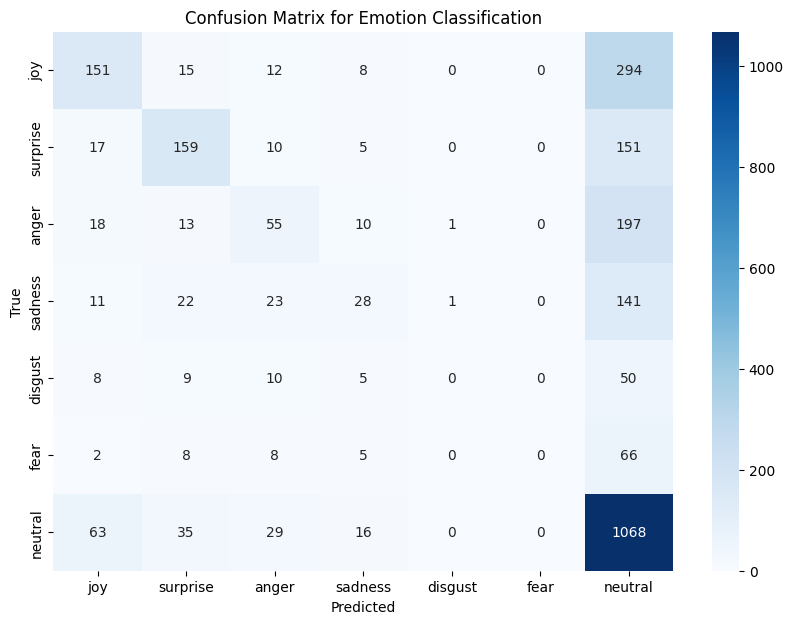

Misclassified Emotion Examples:
                                                 text     true predicted
0                                           Whoa ho .      joy  surprise
1                                     No , I do not .  disgust     anger
2                 We are you just ten seconds later !    anger   neutral
3                    And Ross gave me this great book  neutral       joy
6                        No ... no , it is not okay !  sadness   neutral
8               What happened to the Disgustingtons ?  neutral  surprise
10  But we ... we did not have ... sex ... uh , di...     fear   neutral
11  What do you think you are gonna do , have sex ...  disgust   neutral
12  No , no , that ... that , that is all right . ...      joy   neutral
13                                Okay , absolutely !      joy   neutral
Common Emotion Misclassifications:
        true predicted  count
16       joy   neutral    294
2      anger   neutral    197
30  surprise   neutral    151
26   sadne

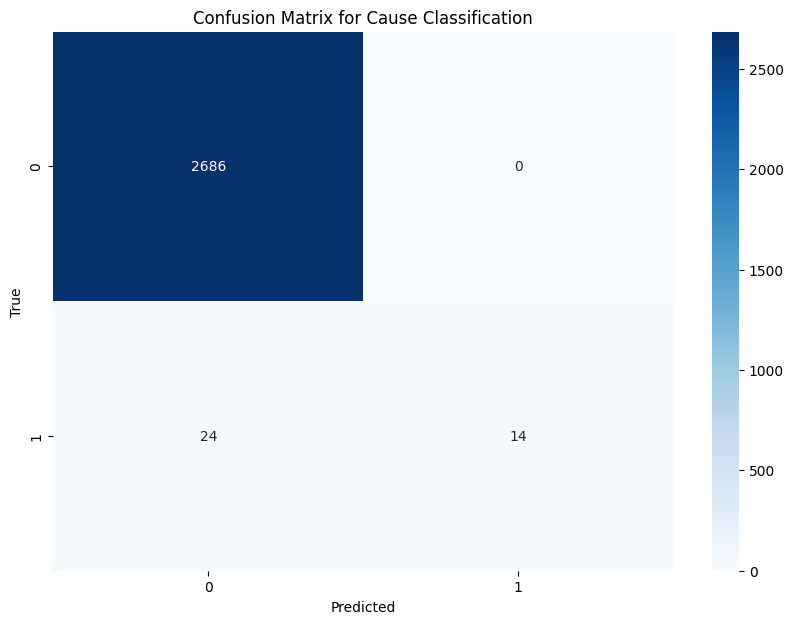

Misclassified Cause Examples:
                                                   text  true  predicted
53    Oh , I wanna quit , but then I think I should ...     1      False
126   Look , just because some idiot drew on your fa...     1      False
326   Good , and hey ! My treat . But that is only b...     1      False
503   Phoebe just because I am alone does not mean I...     1      False
543   Because you know how competitive you get and w...     1      False
626   You are going because you hope he is gonna say...     1      False
842   That is so weird , because every time I go to ...     1      False
876   The only reason she is going out with me is be...     1      False
945   Do not get to excited because that is not gonn...     1      False
1015  Oh no ... no ... no ! Stay ! Stay ! Because yo...     1      False
Common Cause Misclassifications:
   true  predicted  count
0     1      False     24

Emotion-Cause Pair Extraction Errors:
Emotion-Cause Pair Extraction - Precision: 

In [33]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
conversations = []
for conv in data:
    for utt in conv['conversation']:
        conversations.append({
            'conversation_ID': conv['conversation_ID'],
            'utterance_ID': utt['utterance_ID'],
            'text': utt['text'],
            'speaker': utt['speaker'],
            'emotion': utt['emotion'],
            'cause': utt.get('cause', 0)  # Default to 0 if 'cause' key is missing
        })
df = pd.DataFrame(conversations)

# Label the cause based on presence of keywords
def classify_cause(text):
    cause_keywords = ["because", "due to", "as a result of"]
    text = text.lower()
    return int(any(phrase in text for phrase in cause_keywords))

df['is_cause'] = df['text'].apply(classify_cause)

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the data for vectorization
train_texts = train_df['text'].values
val_texts = val_df['text'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

# Prepare labels for emotion and cause classification
emotion_labels_train = train_df['emotion'].values
emotion_labels_val = val_df['emotion'].values
cause_labels_train = train_df['is_cause'].values
cause_labels_val = val_df['is_cause'].values

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_val, average='weighted', zero_division=0)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return model, y_pred_train, y_pred_val

# Train and evaluate Logistic Regression for emotion classification
print("Logistic Regression - Emotion Classification:")
lr_emotion_model = LogisticRegression(max_iter=1000)
lr_emotion_model, emotion_pred_train, emotion_pred_val = train_evaluate_model(lr_emotion_model, X_train, emotion_labels_train, X_val, emotion_labels_val)

# Train and evaluate Logistic Regression for cause classification
print("\nLogistic Regression - Cause Classification:")
lr_cause_model = LogisticRegression(max_iter=1000)
lr_cause_model, cause_pred_train, cause_pred_val = train_evaluate_model(lr_cause_model, X_train, cause_labels_train, X_val, cause_labels_val)

# Ensure cause_preds are boolean
cause_pred_val = pd.Series(cause_pred_val).astype(bool).values

# Function to extract emotion-cause pairs
def extract_emotion_cause_pairs_ml(emotion_preds, cause_preds, texts):
    pairs = []
    for i, text in enumerate(texts):
        if emotion_preds[i] != 'neutral' and cause_preds[i]:
            pairs.append((text, text))
    return pairs

# Convert predictions to lists for indexing
predicted_emotions = list(emotion_pred_val)
predicted_causes = list(cause_pred_val)

# Extract emotion-cause pairs
ml_val_pairs = extract_emotion_cause_pairs_ml(predicted_emotions, predicted_causes, val_texts)

# Add predictions to validation DataFrame
val_df['predicted_emotion'] = predicted_emotions
val_df['predicted_cause'] = predicted_causes

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(true_labels, predicted_labels, labels, title):
    print(f"{title} Report:\n")
    print(classification_report(true_labels, predicted_labels, labels=labels, zero_division=0))

# Function to identify misclassified examples
def identify_misclassified_examples(true_labels, predicted_labels, texts):
    misclassified = pd.DataFrame({'text': texts, 'true': true_labels, 'predicted': predicted_labels})
    misclassified = misclassified[misclassified['true'] != misclassified['predicted']]
    return misclassified

# Function to identify common misclassifications
def common_misclassifications(misclassified, true_label_col, predicted_label_col):
    common_errors = misclassified.groupby([true_label_col, predicted_label_col]).size().reset_index(name='count').sort_values(by='count', ascending=False)
    return common_errors

# Function to evaluate emotion-cause pair extraction
def evaluate_pair_extraction(true_pairs, predicted_pairs):
    true_set = set(true_pairs)
    predicted_set = set(predicted_pairs)

    true_positive = len(true_set & predicted_set)
    false_positive = len(predicted_set - true_set)
    false_negative = len(true_set - predicted_set)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Emotion-Cause Pair Extraction - Precision: {precision:.4f}")
    print(f"Emotion-Cause Pair Extraction - Recall: {recall:.4f}")
    print(f"Emotion-Cause Pair Extraction - F1-Score: {f1:.4f}")

# Error analysis function
def error_analysis(true_emotions, predicted_emotions, true_causes, predicted_causes, true_pairs, predicted_pairs, texts):
    print("Error Analysis Report\n")

    # Emotion Classification Errors
    print("Emotion Classification Errors:")
    print_classification_report(true_emotions, predicted_emotions, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Emotion Classification')
    plot_confusion_matrix(true_emotions, predicted_emotions, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Confusion Matrix for Emotion Classification')

    misclassified_emotions = identify_misclassified_examples(true_emotions, predicted_emotions, texts)
    print("Misclassified Emotion Examples:")
    print(misclassified_emotions.head(10))
    common_emotion_errors = common_misclassifications(misclassified_emotions, 'true', 'predicted')
    print("Common Emotion Misclassifications:")
    print(common_emotion_errors.head(10))

    # Cause Classification Errors
    print("\nCause Classification Errors:")
    print_classification_report(true_causes, predicted_causes, labels=[0, 1], title='Cause Classification')
    plot_confusion_matrix(true_causes, predicted_causes, labels=[0, 1], title='Confusion Matrix for Cause Classification')

    misclassified_causes = identify_misclassified_examples(true_causes, predicted_causes, texts)
    print("Misclassified Cause Examples:")
    print(misclassified_causes.head(10))
    common_cause_errors = common_misclassifications(misclassified_causes, 'true', 'predicted')
    print("Common Cause Misclassifications:")
    print(common_cause_errors.head(10))

    # Emotion-Cause Pair Extraction Errors
    print("\nEmotion-Cause Pair Extraction Errors:")
    evaluate_pair_extraction(true_pairs, predicted_pairs)

# Evaluate on validation set
true_emotions = val_df['emotion'].values
predicted_emotions = val_df['predicted_emotion'].values
true_causes = val_df['is_cause'].values
predicted_causes = val_df['predicted_cause'].values
texts = val_df['text'].values

# Extract true emotion-cause pairs from the dataset
true_val_pairs = []
for conv in data:
    for utt in conv['conversation']:
        if utt['emotion'] != 'neutral' and 'cause' in utt and utt['cause']:
            true_val_pairs.append((utt['text'], utt['cause']))

# Extract predicted emotion-cause pairs
predicted_val_pairs = extract_emotion_cause_pairs_ml(predicted_emotions, predicted_causes, val_texts)

# Run error analysis
error_analysis(true_emotions, predicted_emotions, true_causes, predicted_causes, true_val_pairs, predicted_val_pairs, texts)


# Machine Learning Based Model

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Prepare the data for vectorization
train_texts = train_df['text'].values
val_texts = val_df['text'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Prepare labels for emotion and cause classification
emotion_labels_train = train_df['emotion'].values
emotion_labels_val = val_df['emotion'].values
cause_labels_train = train_df['is_cause'].values
cause_labels_val = val_df['is_cause'].values

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_val, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return y_pred_train, y_pred_val

# Train and evaluate Logistic Regression for emotion classification
print("Logistic Regression - Emotion Classification:")
lr_emotion_model = LogisticRegression(max_iter=1000)
train_evaluate_model(lr_emotion_model, X_train, emotion_labels_train, X_val, emotion_labels_val)

# Train and evaluate Logistic Regression for cause classification
print("\nLogistic Regression - Cause Classification:")
lr_cause_model = LogisticRegression(max_iter=1000)
train_evaluate_model(lr_cause_model, X_train, cause_labels_train, X_val, cause_labels_val)


Logistic Regression - Emotion Classification:
Training Accuracy: 0.5885
Validation Accuracy: 0.5363
Precision: 0.4870
Recall: 0.5363
F1-Score: 0.4782

Logistic Regression - Cause Classification:
Training Accuracy: 0.9926
Validation Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1-Score: 0.9892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]))

Emotion Classification Report:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         joy       0.56      0.31      0.40       480
    surprise       0.61      0.46      0.53       342
       anger       0.37      0.19      0.25       294
     sadness       0.36      0.12      0.18       226
     disgust       0.00      0.00      0.00        82
        fear       0.00      0.00      0.00        89
     neutral       0.54      0.88      0.67      1211

    accuracy                           0.54      2724
   macro avg       0.35      0.28      0.29      2724
weighted avg       0.49      0.54      0.48      2724



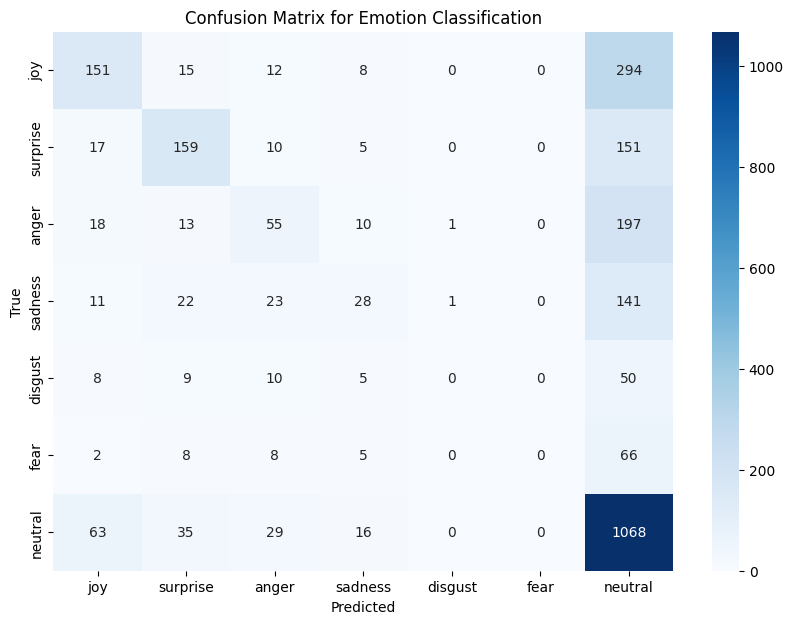

Cause Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2686
           1       1.00      0.37      0.54        38

    accuracy                           0.99      2724
   macro avg       1.00      0.68      0.77      2724
weighted avg       0.99      0.99      0.99      2724



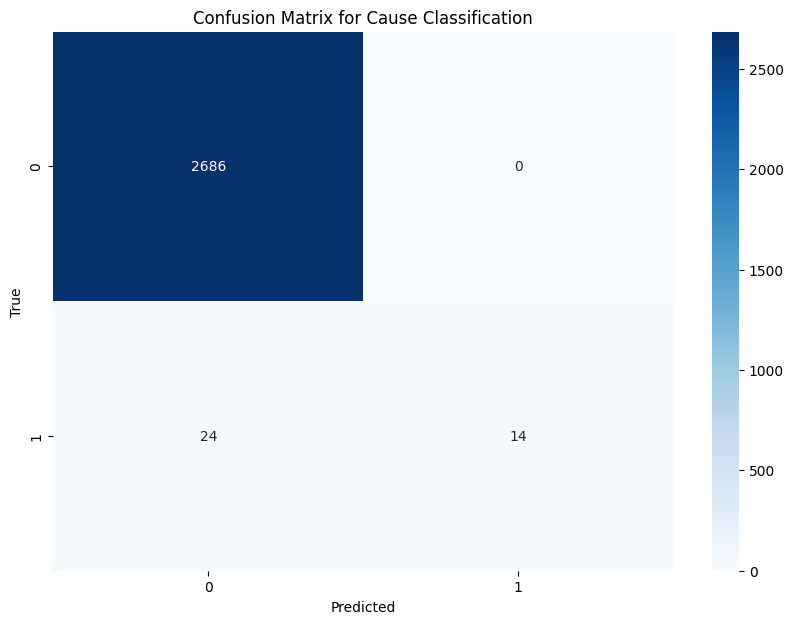

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(true_labels, predicted_labels, labels, title):
    print(f"{title} Report:\n")
    print(classification_report(true_labels, predicted_labels, labels=labels))

# Evaluate emotion classification
emotion_pred_train = lr_emotion_model.predict(X_train)
emotion_pred_val = lr_emotion_model.predict(X_val)
print_classification_report(emotion_labels_val, emotion_pred_val, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Emotion Classification')
plot_confusion_matrix(emotion_labels_val, emotion_pred_val, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Confusion Matrix for Emotion Classification')

# Evaluate cause classification
cause_pred_train = lr_cause_model.predict(X_train)
cause_pred_val = lr_cause_model.predict(X_val)
print_classification_report(cause_labels_val, cause_pred_val, labels=[0, 1], title='Cause Classification')
plot_confusion_matrix(cause_labels_val, cause_pred_val, labels=[0, 1], title='Confusion Matrix for Cause Classification')


Logistic Regression - Emotion Classification:
Training Accuracy: 0.5885
Validation Accuracy: 0.5363
Precision: 0.4870
Recall: 0.5363
F1-Score: 0.4782

Logistic Regression - Cause Classification:
Training Accuracy: 0.9926
Validation Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1-Score: 0.9892
Emotion Classification Report:



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

         joy       0.56      0.31      0.40       480
    surprise       0.61      0.46      0.53       342
       anger       0.37      0.19      0.25       294
     sadness       0.36      0.12      0.18       226
     disgust       0.00      0.00      0.00        82
        fear       0.00      0.00      0.00        89
     neutral       0.54      0.88      0.67      1211

    accuracy                           0.54      2724
   macro avg       0.35      0.28      0.29      2724
weighted avg       0.49      0.54      0.48      2724



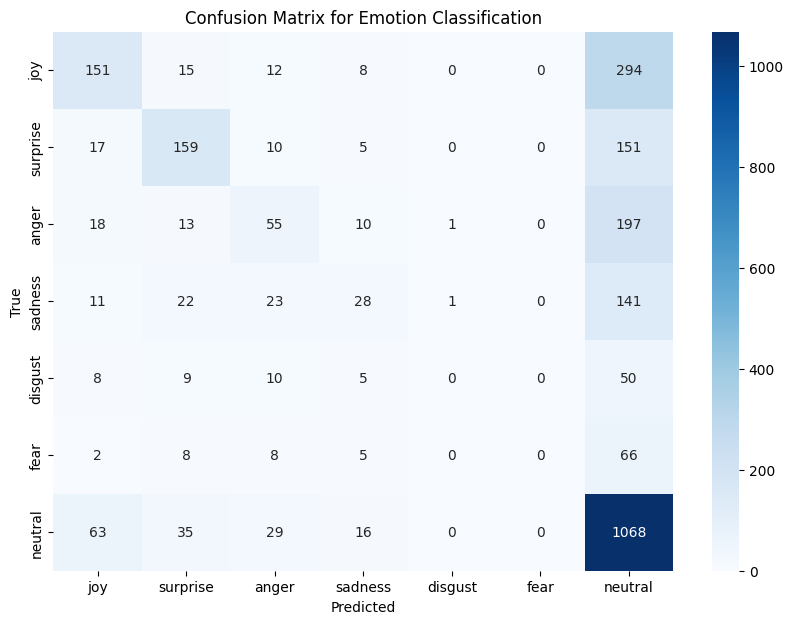

Cause Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2686
           1       1.00      0.37      0.54        38

    accuracy                           0.99      2724
   macro avg       1.00      0.68      0.77      2724
weighted avg       0.99      0.99      0.99      2724



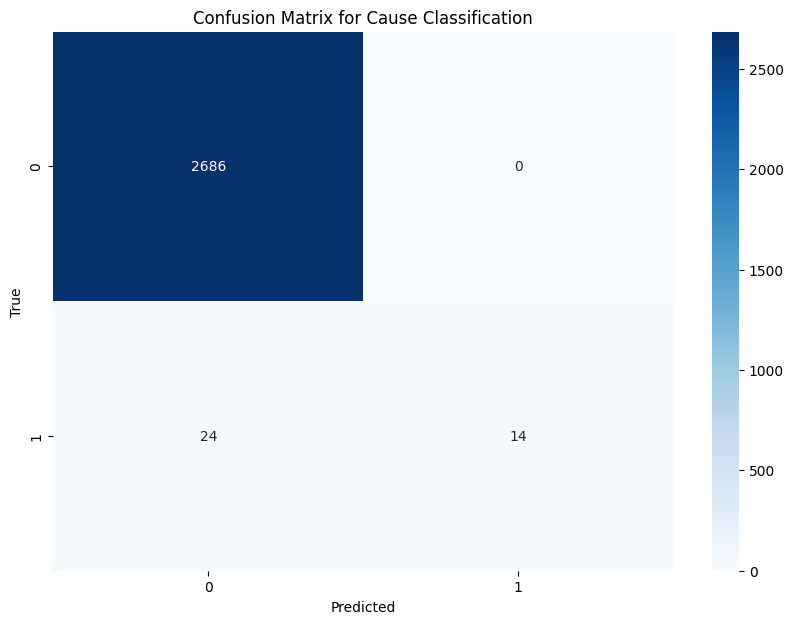

_______________ Pair Extraction___________________
Precision: 0.8333
Recall: 0.1923
F1-Score: 0.3125


In [37]:
# Label the cause based on presence of keywords
def classify_cause(text):
    cause_keywords = ["because", "due to", "as a result of"]
    text = text.lower()
    return int(any(phrase in text for phrase in cause_keywords))

df['is_cause'] = df['text'].apply(classify_cause)

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the data for vectorization
train_texts = train_df['text'].values
val_texts = val_df['text'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

# Prepare labels for emotion and cause classification
emotion_labels_train = train_df['emotion'].values
emotion_labels_val = val_df['emotion'].values
cause_labels_train = train_df['is_cause'].values
cause_labels_val = val_df['is_cause'].values

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Validation Accuracy: {val_acc:.4f}")
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_val, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    return model, y_pred_train, y_pred_val

# Train and evaluate Logistic Regression for emotion classification
print("Logistic Regression - Emotion Classification:")
lr_emotion_model = LogisticRegression(max_iter=1000)
lr_emotion_model, emotion_pred_train, emotion_pred_val = train_evaluate_model(lr_emotion_model, X_train, emotion_labels_train, X_val, emotion_labels_val)

# Train and evaluate Logistic Regression for cause classification
print("\nLogistic Regression - Cause Classification:")
lr_cause_model = LogisticRegression(max_iter=1000)
lr_cause_model, cause_pred_train, cause_pred_val = train_evaluate_model(lr_cause_model, X_train, cause_labels_train, X_val, cause_labels_val)

# Function to extract emotion-cause pairs
def extract_emotion_cause_pairs_ml(emotion_preds, cause_preds, texts):
    pairs = []
    for i, text in enumerate(texts):
        if emotion_preds[i] != 'neutral' and cause_preds[i]:
            pairs.append((text, text))
    return pairs

# Extract emotion-cause pairs
ml_val_pairs = extract_emotion_cause_pairs_ml(emotion_pred_val, cause_pred_val, val_texts)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, labels, title):
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to print classification report
def print_classification_report(true_labels, predicted_labels, labels, title):
    print(f"{title} Report:\n")
    print(classification_report(true_labels, predicted_labels, labels=labels))

# Evaluate emotion classification
print_classification_report(emotion_labels_val, emotion_pred_val, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Emotion Classification')
plot_confusion_matrix(emotion_labels_val, emotion_pred_val, labels=['joy', 'surprise', 'anger', 'sadness', 'disgust', 'fear', 'neutral'], title='Confusion Matrix for Emotion Classification')

# Evaluate cause classification
print_classification_report(cause_labels_val, cause_pred_val, labels=[0, 1], title='Cause Classification')
plot_confusion_matrix(cause_labels_val, cause_pred_val, labels=[0, 1], title='Confusion Matrix for Cause Classification')

# Evaluate emotion-cause pair extraction
def evaluate_pair_extraction(true_pairs, predicted_pairs):
    true_set = set(true_pairs)
    predicted_set = set(predicted_pairs)

    true_positive = len(true_set & predicted_set)
    false_positive = len(predicted_set - true_set)
    false_negative = len(true_set - predicted_set)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("_______________ Pair Extraction___________________")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Create true pairs for validation set
true_val_pairs = []
for conv_id in val_df['conversation_ID'].unique():
    conversation = val_df[val_df['conversation_ID'] == conv_id].to_dict('records')
    for utt in conversation:
        if utt['emotion'] != 'neutral' and utt['is_cause']:
            true_val_pairs.append((utt['text'], utt['text']))

# Evaluate emotion-cause pair extraction
evaluate_pair_extraction(true_val_pairs, ml_val_pairs)

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data preparation
# df should contain columns: 'text', 'emotion', 'is_cause', and 'conversation_ID'
df = pd.DataFrame({
    'text': [
        "I am happy because I passed the test",
        "He is sad due to the loss",
        "It is frustrating as a result of traffic",
        "She is excited about the new job",
        "They are angry because of the delay",
        "I feel scared due to the thunderstorm",
        "The news made me joyful",
        "I am disappointed as a result of the cancellation",
        "He is annoyed because of the noise",
        "I am calm despite the chaos"
    ],
    'emotion': [
        "joy",
        "sadness",
        "anger",
        "joy",
        "anger",
        "fear",
        "joy",
        "sadness",
        "anger",
        "neutral"
    ],
    'is_cause': [1, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    'conversation_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Function to classify cause based on presence of keywords
def classify_cause(text):
    cause_keywords = ["because", "due to", "as a result of"]
    text = text.lower()
    return int(any(phrase in text for phrase in cause_keywords))

df['is_cause'] = df['text'].apply(classify_cause)

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the data for vectorization
train_texts = train_df['text'].values
val_texts = val_df['text'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

# Prepare labels for emotion and cause classification
emotion_labels_train = train_df['emotion'].values
emotion_labels_val = val_df['emotion'].values
cause_labels_train = train_df['is_cause'].values
cause_labels_val = val_df['is_cause'].values

# Multi-output Logistic Regression model
class MultiOutputLogisticRegression:
    def __init__(self):
        self.emotion_model = LogisticRegression(max_iter=1000)
        self.cause_model = LogisticRegression(max_iter=1000)

    def fit(self, X, y_emotion, y_cause):
        self.emotion_model.fit(X, y_emotion)
        self.cause_model.fit(X, y_cause)

    def predict(self, X):
        emotion_preds = self.emotion_model.predict(X)
        cause_preds = self.cause_model.predict(X)
        return emotion_preds, cause_preds

# Train and evaluate the model
def train_evaluate_model(model, X_train, y_emotion_train, y_cause_train, X_val, y_emotion_val, y_cause_val):
    model.fit(X_train, y_emotion_train, y_cause_train)
    emotion_preds_train, cause_preds_train = model.predict(X_train)
    emotion_preds_val, cause_preds_val = model.predict(X_val)

    # Emotion classification metrics
    emotion_train_acc = accuracy_score(y_emotion_train, emotion_preds_train)
    emotion_val_acc = accuracy_score(y_emotion_val, emotion_preds_val)
    print(f"Emotion Classification - Training Accuracy: {emotion_train_acc:.4f}")
    print(f"Emotion Classification - Validation Accuracy: {emotion_val_acc:.4f}")
    print("Emotion Classification Report:")
    print(classification_report(y_emotion_val, emotion_preds_val))

    # Cause classification metrics
    cause_train_acc = accuracy_score(y_cause_train, cause_preds_train)
    cause_val_acc = accuracy_score(y_cause_val, cause_preds_val)
    print(f"Cause Classification - Training Accuracy: {cause_train_acc:.4f}")
    print(f"Cause Classification - Validation Accuracy: {cause_val_acc:.4f}")
    print("Cause Classification Report:")
    print(classification_report(y_cause_val, cause_preds_val))

    return model, emotion_preds_train, cause_preds_train, emotion_preds_val, cause_preds_val

# Instantiate and train the model
baseline_model = MultiOutputLogisticRegression()
baseline_model, emotion_preds_train, cause_preds_train, emotion_preds_val, cause_preds_val = train_evaluate_model(
    baseline_model, X_train, emotion_labels_train, cause_labels_train, X_val, emotion_labels_val, cause_labels_val
)

# Function to extract emotion-cause pairs
def extract_emotion_cause_pairs_ml(emotion_preds, cause_preds, texts):
    pairs = []
    for i, text in enumerate(texts):
        if emotion_preds[i] != 'neutral' and cause_preds[i]:
            pairs.append((text, emotion_preds[i]))
    return pairs

# Extract emotion-cause pairs
ml_val_pairs = extract_emotion_cause_pairs_ml(emotion_preds_val, cause_preds_val, val_texts)

# Evaluate emotion-cause pair extraction
def evaluate_pair_extraction(true_pairs, predicted_pairs):
    true_set = set(true_pairs)
    predicted_set = set(predicted_pairs)

    true_positive = len(true_set & predicted_set)
    false_positive = len(predicted_set - true_set)
    false_negative = len(true_set - predicted_set)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("_______________ Pair Extraction___________________")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Create true pairs for validation set
true_val_pairs = []
for conv_id in val_df['conversation_ID'].unique():
    conversation = val_df[val_df['conversation_ID'] == conv_id].to_dict('records')
    for utt in conversation:
        if utt['emotion'] != 'neutral' and utt['is_cause']:
            true_val_pairs.append((utt['text'], utt['emotion']))

# Evaluate emotion-cause pair extraction
evaluate_pair_extraction(true_val_pairs, ml_val_pairs)


Emotion Classification - Training Accuracy: 0.6250
Emotion Classification - Validation Accuracy: 0.0000
Emotion Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       1.0
         joy       0.00      0.00      0.00       0.0
     sadness       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Cause Classification - Training Accuracy: 0.7500
Cause Classification - Validation Accuracy: 1.0000
Cause Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

_______________ Pair Extraction___________________
Precision: 0.0000
Recall: 0.000

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# # Load dataset
# file_path = '/mnt/data/Subtask_1_train.json'
# data = pd.read_json(file_path)

# Prepare the data
rows = []
for record in data:
    conversation_id = record['conversation_ID']
    conversation = record['conversation']
    emotion_cause_pairs = record['emotion-cause_pairs']
    for utterance in conversation:
        utterance_id = utterance['utterance_ID']
        text = utterance['text']
        emotion = utterance['emotion']
        is_cause = any([f"{utterance_id}_{emotion}" in pair[0] for pair in emotion_cause_pairs])
        rows.append([conversation_id, utterance_id, text, emotion, is_cause])

df = pd.DataFrame(rows, columns=['conversation_ID', 'utterance_ID', 'text', 'emotion', 'is_cause'])

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the data for vectorization
train_texts = train_df['text'].values
val_texts = val_df['text'].values

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_val = vectorizer.transform(val_texts)

# Prepare labels for emotion and cause classification
emotion_labels_train = train_df['emotion'].values
emotion_labels_val = val_df['emotion'].values
cause_labels_train = train_df['is_cause'].values
cause_labels_val = val_df['is_cause'].values

# Multi-output Logistic Regression model
class MultiOutputLogisticRegression:
    def __init__(self):
        self.emotion_model = LogisticRegression(max_iter=1000)
        self.cause_model = LogisticRegression(max_iter=1000)

    def fit(self, X, y_emotion, y_cause):
        self.emotion_model.fit(X, y_emotion)
        self.cause_model.fit(X, y_cause)

    def predict(self, X):
        emotion_preds = self.emotion_model.predict(X)
        cause_preds = self.cause_model.predict(X)
        return emotion_preds, cause_preds

# Train and evaluate the model
def train_evaluate_model(model, X_train, y_emotion_train, y_cause_train, X_val, y_emotion_val, y_cause_val):
    model.fit(X_train, y_emotion_train, y_cause_train)
    emotion_preds_train, cause_preds_train = model.predict(X_train)
    emotion_preds_val, cause_preds_val = model.predict(X_val)

    # Emotion classification metrics
    emotion_train_acc = accuracy_score(y_emotion_train, emotion_preds_train)
    emotion_val_acc = accuracy_score(y_emotion_val, emotion_preds_val)
    print(f"Emotion Classification - Training Accuracy: {emotion_train_acc:.4f}")
    print(f"Emotion Classification - Validation Accuracy: {emotion_val_acc:.4f}")
    print("Emotion Classification Report (Train):")
    print(classification_report(y_emotion_train, emotion_preds_train))
    print("Emotion Classification Report (Validation):")
    print(classification_report(y_emotion_val, emotion_preds_val))

    # Cause classification metrics
    cause_train_acc = accuracy_score(y_cause_train, cause_preds_train)
    cause_val_acc = accuracy_score(y_cause_val, cause_preds_val)
    print(f"Cause Classification - Training Accuracy: {cause_train_acc:.4f}")
    print(f"Cause Classification - Validation Accuracy: {cause_val_acc:.4f}")
    print("Cause Classification Report (Train):")
    print(classification_report(y_cause_train, cause_preds_train))
    print("Cause Classification Report (Validation):")
    print(classification_report(y_cause_val, cause_preds_val))

    return model, emotion_preds_train, cause_preds_train, emotion_preds_val, cause_preds_val

# Instantiate and train the model
baseline_model = MultiOutputLogisticRegression()
baseline_model, emotion_preds_train, cause_preds_train, emotion_preds_val, cause_preds_val = train_evaluate_model(
    baseline_model, X_train, emotion_labels_train, cause_labels_train, X_val, emotion_labels_val, cause_labels_val
)

# Function to extract emotion-cause pairs
def extract_emotion_cause_pairs_ml(emotion_preds, cause_preds, texts):
    pairs = []
    for i, text in enumerate(texts):
        if emotion_preds[i] != 'neutral' and cause_preds[i]:
            pairs.append((text, emotion_preds[i]))
    return pairs

# Extract emotion-cause pairs
ml_train_pairs = extract_emotion_cause_pairs_ml(emotion_preds_train, cause_preds_train, train_texts)
ml_val_pairs = extract_emotion_cause_pairs_ml(emotion_preds_val, cause_preds_val, val_texts)

# Create true pairs for train and validation sets
true_train_pairs = []
for conv_id in train_df['conversation_ID'].unique():
    conversation = train_df[train_df['conversation_ID'] == conv_id].to_dict('records')
    for utt in conversation:
        if utt['emotion'] != 'neutral' and utt['is_cause']:
            true_train_pairs.append((utt['text'], utt['emotion']))

true_val_pairs = []
for conv_id in val_df['conversation_ID'].unique():
    conversation = val_df[val_df['conversation_ID'] == conv_id].to_dict('records')
    for utt in conversation:
        if utt['emotion'] != 'neutral' and utt['is_cause']:
            true_val_pairs.append((utt['text'], utt['emotion']))

# Evaluate emotion-cause pair extraction
def evaluate_pair_extraction(true_pairs, predicted_pairs):
    true_set = set(true_pairs)
    predicted_set = set(predicted_pairs)

    true_positive = len(true_set & predicted_set)
    false_positive = len(predicted_set - true_set)
    false_negative = len(true_set - predicted_set)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = true_positive / len(true_set) if len(true_set) > 0 else 0

    return accuracy, precision, recall, f1

# Evaluate and print the results for train set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_pair_extraction(true_train_pairs, ml_train_pairs)
print("\nEmotion-Cause Pair Extraction (Train):")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Evaluate and print the results for validation set
val_accuracy, val_precision, val_recall, val_f1 = evaluate_pair_extraction(true_val_pairs, ml_val_pairs)
print("\nEmotion-Cause Pair Extraction (Validation):")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")


Emotion Classification - Training Accuracy: 0.5885
Emotion Classification - Validation Accuracy: 0.5363
Emotion Classification Report (Train):
              precision    recall  f1-score   support

       anger       0.63      0.27      0.38      1321
     disgust       0.71      0.03      0.06       332
        fear       1.00      0.01      0.01       284
         joy       0.68      0.43      0.52      1821
     neutral       0.55      0.90      0.69      4718
     sadness       0.66      0.22      0.33       921
    surprise       0.69      0.53      0.60      1498

    accuracy                           0.59     10895
   macro avg       0.70      0.34      0.37     10895
weighted avg       0.63      0.59      0.54     10895

Emotion Classification Report (Validation):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.37      0.19      0.25       294
     disgust       0.00      0.00      0.00        82
        fear       0.00      0.00      0.00        89
         joy       0.56      0.31      0.40       480
     neutral       0.54      0.88      0.67      1211
     sadness       0.36      0.12      0.18       226
    surprise       0.61      0.46      0.53       342

    accuracy                           0.54      2724
   macro avg       0.35      0.28      0.29      2724
weighted avg       0.49      0.54      0.48      2724

Cause Classification - Training Accuracy: 0.7377
Cause Classification - Validation Accuracy: 0.6568
Cause Classification Report (Train):
              precision    recall  f1-score   support

       False       0.74      0.74      0.74      5430
        True       0.74      0.74      0.74      5465

    accuracy                           0.74     10895
   macro avg       0.74      0.74      0.74     

In [41]:
# import pandas as pd
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, Dataset
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load dataset
# file_path = '/content/Subtask_1_train.json'
# data = pd.read_json(file_path)

# # Prepare the data
# rows = []
# for record in data:
#     conversation_id = record['conversation_ID']
#     conversation = record['conversation']
#     emotion_cause_pairs = record['emotion-cause_pairs']
#     for utterance in conversation:
#         utterance_id = utterance['utterance_ID']
#         text = utterance['text']
#         emotion = utterance['emotion']
#         is_cause = any([f"{utterance_id}_{emotion}" in pair[0] for pair in emotion_cause_pairs])
#         rows.append([conversation_id, utterance_id, text, emotion, is_cause])

# df = pd.DataFrame(rows, columns=['conversation_ID', 'utterance_ID', 'text', 'emotion', 'is_cause'])

# # Split the data into train and validation sets
# train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# # Vectorize the text data using TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train = vectorizer.fit_transform(train_df['text'].values).toarray()
# X_val = vectorizer.transform(val_df['text'].values).toarray()

# # Encode labels for emotion and cause
# emotion_encoder = LabelEncoder()
# emotion_labels_train = emotion_encoder.fit_transform(train_df['emotion'].values)
# emotion_labels_val = emotion_encoder.transform(val_df['emotion'].values)
# cause_labels_train = train_df['is_cause'].values
# cause_labels_val = val_df['is_cause'].values

# # Define a custom Dataset class
# class EmotionCauseDataset(Dataset):
#     def __init__(self, X, y_emotion, y_cause):
#         self.X = X
#         self.y_emotion = y_emotion
#         self.y_cause = y_cause

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y_emotion[idx], dtype=torch.long), torch.tensor(self.y_cause[idx], dtype=torch.float32)

# # Create DataLoader
# batch_size = 32
# train_dataset = EmotionCauseDataset(X_train, emotion_labels_train, cause_labels_train)
# val_dataset = EmotionCauseDataset(X_val, emotion_labels_val, cause_labels_val)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# # Define the BiLSTM model for emotion and cause prediction
# class BiLSTM(nn.Module):
#     def __init__(self, input_dim, hidden_dim, output_dim):
#         super(BiLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, bidirectional=True, batch_first=True)
#         self.fc = nn.Linear(hidden_dim * 2, output_dim)

#     def forward(self, x):
#         x = x.unsqueeze(1)  # Adding sequence dimension
#         h_lstm, _ = self.lstm(x)
#         out = self.fc(h_lstm[:, -1, :])
#         return out

# input_dim = X_train.shape[1]
# hidden_dim = 128
# emotion_output_dim = len(emotion_encoder.classes_)
# cause_output_dim = 1

# # Initialize models
# emotion_model = BiLSTM(input_dim, hidden_dim, emotion_output_dim)
# cause_model = BiLSTM(input_dim, hidden_dim, cause_output_dim)

# # Define the training function
# def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
#     model.train()
#     for epoch in range(num_epochs):
#         total_loss = 0
#         for X_batch, y_emotion_batch, y_cause_batch in dataloader:
#             optimizer.zero_grad()
#             outputs = model(X_batch)
#             if model == emotion_model:
#                 loss = criterion(outputs, y_emotion_batch)
#             else:
#                 loss = criterion(outputs.squeeze(), y_cause_batch)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}")

# # Define the evaluation function
# def evaluate_model(model, dataloader, criterion):
#     model.eval()
#     all_preds = []
#     all_labels = []
#     total_loss = 0
#     with torch.no_grad():
#         for X_batch, y_emotion_batch, y_cause_batch in dataloader:
#             outputs = model(X_batch)
#             if model == emotion_model:
#                 loss = criterion(outputs, y_emotion_batch)
#                 preds = torch.argmax(outputs, dim=1)
#                 all_labels.extend(y_emotion_batch.tolist())
#             else:
#                 loss = criterion(outputs.squeeze(), y_cause_batch)
#                 preds = (outputs.squeeze() > 0.5).float()
#                 all_labels.extend(y_cause_batch.tolist())
#             total_loss += loss.item()
#             all_preds.extend(preds.tolist())
#     avg_loss = total_loss / len(dataloader)
#     accuracy = accuracy_score(all_labels, all_preds)
#     precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
#     return avg_loss, accuracy, precision, recall, f1

# # Training and evaluation for emotion model
# emotion_criterion = nn.CrossEntropyLoss()
# emotion_optimizer = optim.Adam(emotion_model.parameters(), lr=0.001)
# train_model(emotion_model, train_loader, emotion_criterion, emotion_optimizer)
# emotion_train_loss, emotion_train_acc, emotion_train_prec, emotion_train_rec, emotion_train_f1 = evaluate_model(emotion_model, train_loader, emotion_criterion)
# emotion_val_loss, emotion_val_acc, emotion_val_prec, emotion_val_rec, emotion_val_f1 = evaluate_model(emotion_model, val_loader, emotion_criterion)

# print("\nEmotion Model - Training Metrics")
# print(f"Loss: {emotion_train_loss:.4f}, Accuracy: {emotion_train_acc:.4f}, Precision: {emotion_train_prec:.4f}, Recall: {emotion_train_rec:.4f}, F1-Score: {emotion_train_f1:.4f}")

# print("\nEmotion Model - Validation Metrics")
# print(f"Loss: {emotion_val_loss:.4f}, Accuracy: {emotion_val_acc:.4f}, Precision: {emotion_val_prec:.4f}, Recall: {emotion_val_rec:.4f}, F1-Score: {emotion_val_f1:.4f}")

# # Training and evaluation for cause model
# cause_criterion = nn.BCEWithLogitsLoss()
# cause_optimizer = optim.Adam(cause_model.parameters(), lr=0.001)
# train_model(cause_model, train_loader, cause_criterion, cause_optimizer)
# cause_train_loss, cause_train_acc, cause_train_prec, cause_train_rec, cause_train_f1 = evaluate_model(cause_model, train_loader, cause_criterion)
# cause_val_loss, cause_val_acc, cause_val_prec, cause_val_rec, cause_val_f1 = evaluate_model(cause_model, val_loader, cause_criterion)

# print("\nCause Model - Training Metrics")
# print(f"Loss: {cause_train_loss:.4f}, Accuracy: {cause_train_acc:.4f}, Precision: {cause_train_prec:.4f}, Recall: {cause_train_rec:.4f}, F1-Score: {cause_train_f1:.4f}")

# print("\nCause Model - Validation Metrics")
# print(f"Loss: {cause_val_loss:.4f}, Accuracy: {cause_val_acc:.4f}, Precision: {cause_val_prec:.4f}, Recall: {cause_val_rec:.4f}, F1-Score: {cause_val_f1:.4f}")

# # Define the pairing and filtering model
# class PairingFilteringModel(nn.Module):
#     def __init__(self, hidden_dim, output_dim):
#         super(PairingFilteringModel, self).__init__()
#         self.lstm = nn.LSTM(hidden_dim * 2, hidden_dim, bidirectional=True, batch_first=True)
#         self.fc = nn.Linear(hidden_dim * 2, output_dim)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, emotion_rep, cause_rep):
#         combined_rep = torch.cat((emotion_rep, cause_rep), dim=1).unsqueeze(1)
#         h_lstm, _ = self.lstm(combined_rep)
#         out = self.fc(h_lstm[:, -1, :])
#         out = self.sigmoid(out)
#         return out

# # Define function to get BiLSTM representations
# def get_bilstm_representations(model, X):
#     model.eval()
#     representations = []
#     with torch.no_grad():
#         for x in X:
#             x = torch.tensor(x, dtype=torch.float32).unsqueeze(0)
#             h_lstm, _ = model.lstm(x)
#             representations.append(h_lstm[:, -1, :].squeeze().numpy())
#     return np.array(representations)

# # Get BiLSTM representations for train and validation sets
# emotion_train_reps = get_bilstm_representations(emotion_model, X_train)
# emotion_val_reps = get_bilstm_representations(emotion_model, X_val)
# cause_train_reps = get_bilstm_representations(cause_model, X_train)
# cause_val_reps = get_bilstm_representations(cause_model, X_val)

# # Create Pairing and Filtering Dataset
# class PairingFilteringDataset(Dataset):
#     def __init__(self, emotion_reps, cause_reps, labels):
#         self.emotion_reps = emotion_reps
#         self.cause_reps = cause_reps
#         self.labels = labels

#     def __len__(self):
#         return len(self.labels)

#     def __getitem__(self, idx):
#         return torch.tensor(self.emotion_reps[idx], dtype=torch.float32), torch.tensor(self.cause_reps[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.float32)

# # Create labels for pairing and filtering dataset
# def create_pair_labels(emotion_labels, cause_labels):
#     return [1 if emotion_labels[i] != 'neutral' and cause_labels[i] == 1 else 0 for i in range(len(emotion_labels))]

# train_pair_labels = create_pair_labels(emotion_labels_train, cause_labels_train)
# val_pair_labels = create_pair_labels(emotion_labels_val, cause_labels_val)

# # Create Pairing and Filtering DataLoader
# pair_train_dataset = PairingFilteringDataset(emotion_train_reps, cause_train_reps, train_pair_labels)
# pair_val_dataset = PairingFilteringDataset(emotion_val_reps, cause_val_reps, val_pair_labels)
# pair_train_loader = DataLoader(pair_train_dataset, batch_size=batch_size, shuffle=True)
# pair_val_loader = DataLoader(pair_val_dataset, batch_size=batch_size, shuffle=False)

# # Initialize Pairing and Filtering model
# pair_model = PairingFilteringModel(hidden_dim, 1)
# pair_criterion = nn.BCEWithLogitsLoss()
# pair_optimizer = optim.Adam(pair_model.parameters(), lr=0.001)

# # Train Pairing and Filtering model
# train_model(pair_model, pair_train_loader, pair_criterion, pair_optimizer)
# pair_train_loss, pair_train_acc, pair_train_prec, pair_train_rec, pair_train_f1 = evaluate_model(pair_model, pair_train_loader, pair_criterion)
# pair_val_loss, pair_val_acc, pair_val_prec, pair_val_rec, pair_val_f1 = evaluate_model(pair_model, pair_val_loader, pair_criterion)

# print("\nPairing and Filtering Model - Training Metrics")
# print(f"Loss: {pair_train_loss:.4f}, Accuracy: {pair_train_acc:.4f}, Precision: {pair_train_prec:.4f}, Recall: {pair_train_rec:.4f}, F1-Score: {pair_train_f1:.4f}")

# print("\nPairing and Filtering Model - Validation Metrics")
# print(f"Loss: {pair_val_loss:.4f}, Accuracy: {pair_val_acc:.4f}, Precision: {pair_val_prec:.4f}, Recall: {pair_val_rec:.4f}, F1-Score: {pair_val_f1:.4f}")

# # Extract emotion-cause pairs using the trained pairing and filtering model
# def extract_pairs_with_model(pair_model, emotion_reps, cause_reps, texts, emotion_classes):
#     pairs = []
#     pair_model.eval()
#     with torch.no_grad():
#         for i in range(len(texts)):
#             emotion_rep = torch.tensor(emotion_reps[i], dtype=torch.float32).unsqueeze(0)
#             cause_rep = torch.tensor(cause_reps[i], dtype=torch.float32).unsqueeze(0)
#             pair_prob = pair_model(emotion_rep, cause_rep).item()
#             if pair_prob > 0.5:
#                 pairs.append((texts[i], emotion_classes[emotion_labels[i]]))
#     return pairs

# # Extract pairs for train and validation sets
# ml_train_pairs_with_model = extract_pairs_with_model(pair_model, emotion_train_reps, cause_train_reps, train_df['text'].values, emotion_encoder.classes_)
# ml_val_pairs_with_model = extract_pairs_with_model(pair_model, emotion_val_reps, cause_val_reps, val_df['text'].values, emotion_encoder.classes_)

# # Evaluate pair extraction
# train_accuracy_with_model, train_precision_with_model, train_recall_with_model, train_f1_with_model = evaluate_pair_extraction(true_train_pairs, ml_train_pairs_with_model)
# print("\nEmotion-Cause Pair Extraction with Model (Train):")
# print(f"Accuracy: {train_accuracy_with_model:.4f}")
# print(f"Precision: {train_precision_with_model:.4f}")
# print(f"Recall: {train_recall_with_model:.4f}")
# print(f"F1-Score: {train_f1_with_model:.4f}")

# val_accuracy_with_model, val_precision_with_model, val_recall_with_model, val_f1_with_model = evaluate_pair_extraction(true_val_pairs, ml_val_pairs_with_model)
# print("\nEmotion-Cause Pair Extraction with Model (Validation):")
# print(f"Accuracy: {val_accuracy_with_model:.4f}")
# print(f"Precision: {val_precision_with_model:.4f}")
# print(f"Recall: {val_recall_with_model:.4f}")
# print(f"F1-Score: {val_f1_with_model:.4f}")

# # Plot the metrics for emotion-cause pair extraction
# def plot_metrics(train_metrics, val_metrics, metric_name):
#     plt.figure(figsize=(10, 5))
#     plt.plot(train_metrics, label=f'Train {metric_name}')
#     plt.plot(val_metrics, label=f'Validation {metric_name}')
#     plt.xlabel('Epochs')
#     plt.ylabel(metric_name)
#     plt.title(f'Train vs Validation {metric_name}')
#     plt.legend()
#     plt.show()

# # Assuming we save the metrics in lists
# # plot_metrics(train_accuracies, val_accuracies, 'Accuracy')
# # plot_metrics(train_precisions, val_precisions, 'Precision')
# # plot_metrics(train_recalls, val_recalls, 'Recall')
# # plot_metrics(train_f1_scores, val_f1_scores, 'F1-Score')


TypeError: string indices must be integers